# LINEAR REGRESSION

Our group performed Linear Regression which aims to model the relationship between two or more variables by fitting a linear equation to observed data.

This is done by comparing Numerical Predictors with Response Predictors `CDR`, mainly `Age`, `MMSE`, `eTIV`, `nWBV` and `ASF`.

Our group also removed all the outliers from the data set as they could potentially skew the data and affect the accuracy of our results.

# IMPORT ESSENTIAL PYTHON LIBRARIES

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# IMPORT THE DATASET

In [4]:
alzheimersData = pd.read_csv('cleaned-alzheimers-dataset.csv')
alzheimersData.head()

,Unnamed: 0,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,8,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
4,9,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


# HELPER FUNCTION
Simple python functions can be written and called since the logic is repeated

In [4]:
def main(predict,response):
    X_train, X_test, y_train, y_test = train_test_split(predict, response, test_size=0.2)
    
    linreg = LinearRegression() 
    linreg.fit(X_train,y_train)

    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regresion \t: a = ',linreg.coef_)
    print()

    #Predict total values corresponding to Sale Price
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Calculate Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 2)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    train_mse = mean_sq_err(y_train, y_train_pred)
    print("Mean Squared Error (MSE) \t:", train_mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(train_mse))

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    test_mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", test_mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(test_mse))


    return

In [5]:
# Mean Squared Error (MSE) Function
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [6]:
def removeOutliers(data, predict, response):
    
    targetdata = data[[predict, response]].copy()
    
    # Calculate IQR for Predictor and Response
    Q1_predict = data[predict].quantile(0.25)
    Q3_predict = data[predict].quantile(0.75)
    IQR_predict = Q3_predict - Q1_predict
    
    Q1_response = data[response].quantile(0.25)
    Q3_response = data[response].quantile(0.75)
    IQR_response = Q3_response - Q1_response

    # Define outliers for both columns
    outliers_predict= targetdata[(targetdata[predict] < (Q1_predict - 1.5 * IQR_predict)) | (targetdata[predict] > (Q3_predict + 1.5 * IQR_predict))]
    outliers_response = targetdata[(targetdata[response] < (Q1_response - 1.5 * IQR_response)) | (targetdata[response] > (Q3_response + 1.5 * IQR_response))]

    # Union of outliers
    outliers_union = pd.concat([outliers_predict, outliers_response]).drop_duplicates()

    # Remove outliers from the dataset
    clean_data = targetdata.drop(outliers_union.index)
    
    return clean_data

In [7]:
def countOutliers(data, predict, response):
    targetdata = data[[predict, response]].copy()
    
    # Calculate IQR for Predictor and Response
    Q1_predict = data[predict].quantile(0.25)
    Q3_predict = data[predict].quantile(0.75)
    IQR_predict = Q3_predict - Q1_predict
    
    Q1_response = data[response].quantile(0.25)
    Q3_response = data[response].quantile(0.75)
    IQR_response = Q3_response - Q1_response

    # Define outliers for both columns
    outliers_predict = targetdata[(targetdata[predict] < (Q1_predict - 1.5 * IQR_predict)) | (targetdata[predict] > (Q3_predict + 1.5 * IQR_predict))]
    outliers_response = targetdata[(targetdata[response] < (Q1_response - 1.5 * IQR_response)) | (targetdata[response] > (Q3_response + 1.5 * IQR_response))]

    # Union of outliers
    outliers_union = pd.concat([outliers_predict, outliers_response]).drop_duplicates()
    
    # Calculate number of outliers removed
    num_outliers_removed = len(outliers_union)
    
    return num_outliers_removed

# Predicting `CDR` using `Age`

In [8]:
countOutliers(alzheimersData, 'Age', 'CDR')


14

In [9]:
clean_data_age = removeOutliers(alzheimersData, 'Age', 'CDR')
clean_age = pd.DataFrame(clean_data_age['Age'])
clean_cdr = pd.DataFrame(clean_data_age['CDR'])

Intercept of Regression 	: b =  [0.06377474]
Coefficients of Regresion 	: a =  [[0.00285917]]



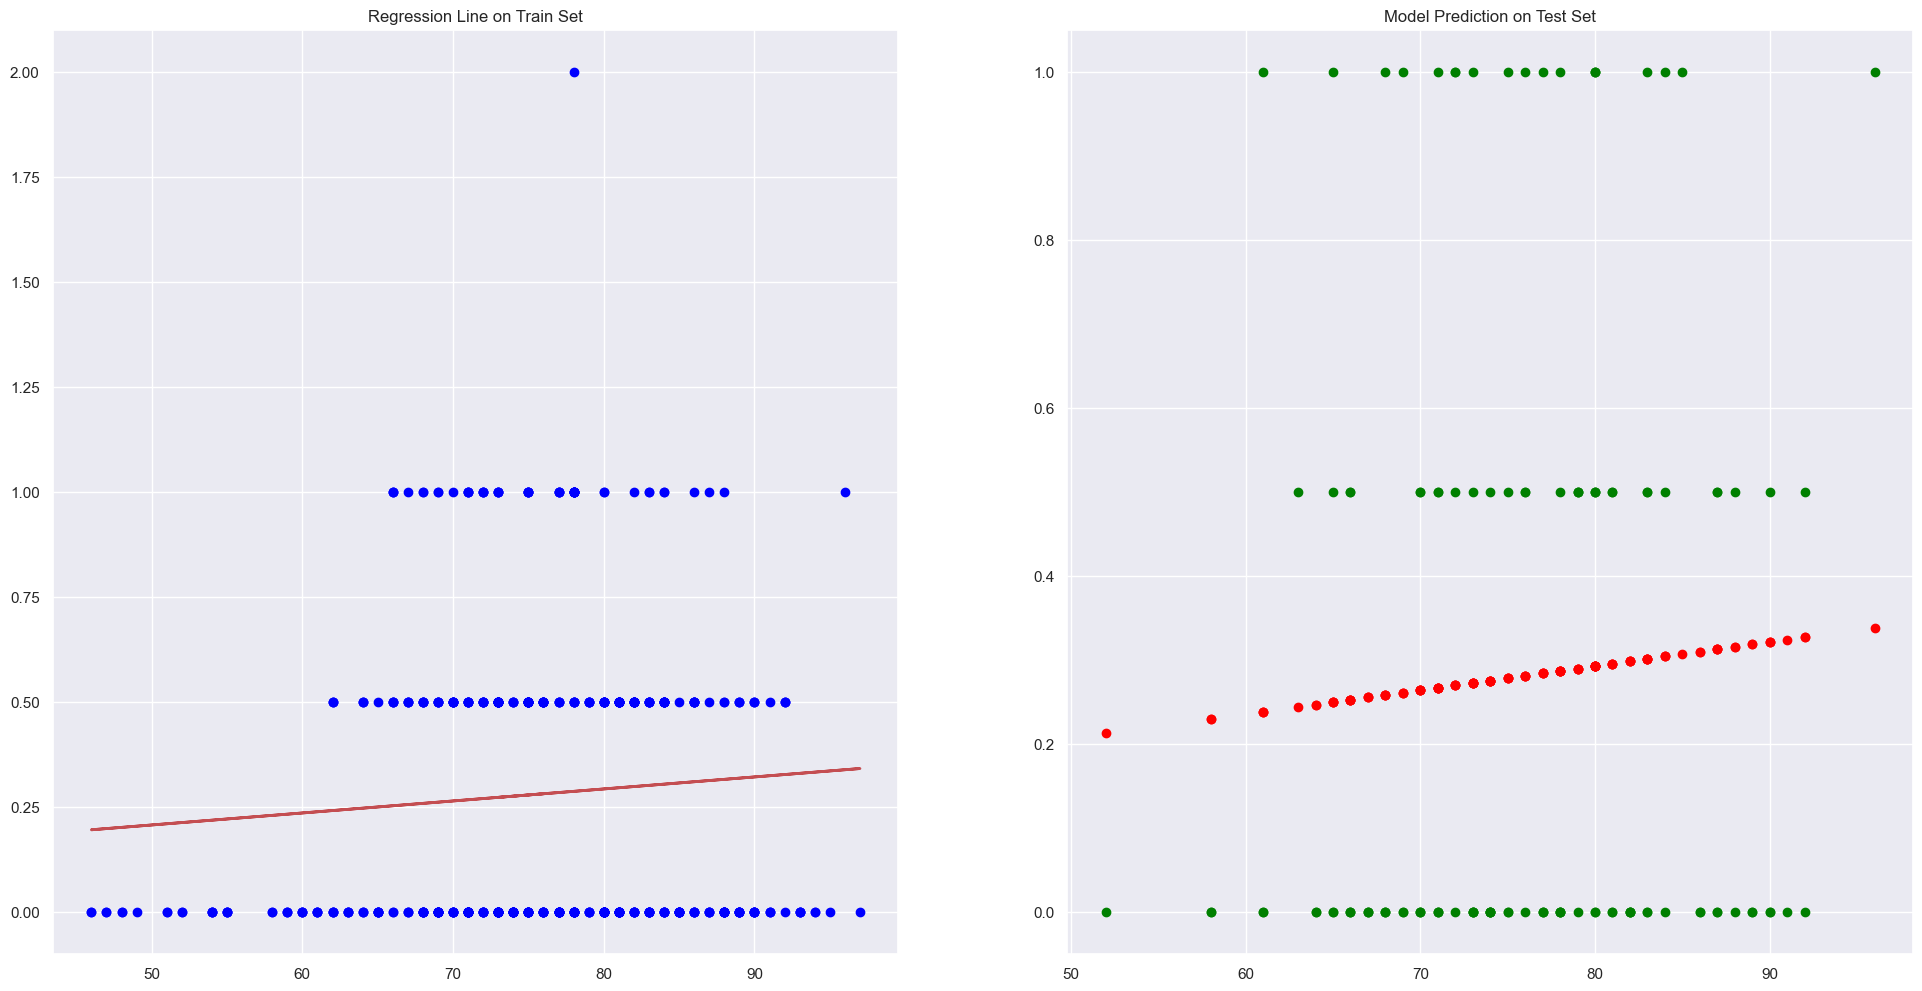

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.005784245652514675
Mean Squared Error (MSE) 	: 0.11985009282934109
Root Mean Squared Error (RMSE) 	: 0.3461937215336828
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.005976462138650218
Mean Squared Error (MSE) 	: 0.13989752919692608
Root Mean Squared Error (RMSE) 	: 0.3740287812413987


In [10]:
main(clean_age, clean_cdr)

### Comments
In both data sets, the statistics values are similar. But in the test data set, the errors increased slightly, 
showing less accuracy. This could be due to the data set training with more subjects with Normal CDR since our data set is imbalanced with mostly normal CDR subjects. 

# Predicting `CDR` using `MMSE`

Since LinearRegression does not accept missing values encoded as NaN natively, we will drop NaN values from `MMSE`


In [11]:
alzheimersData_cleaned = alzheimersData.dropna(subset=['MMSE'])
cdr = pd.DataFrame(alzheimersData_cleaned['CDR'])  # Response
mmse = pd.DataFrame(alzheimersData_cleaned['MMSE'])  # Predictor

In [12]:
countOutliers(alzheimersData, 'MMSE', 'CDR')


13

In [13]:
clean_data_MMSE = removeOutliers(alzheimersData, 'MMSE', 'CDR')
clean_data_MMSE_withoutNaN = clean_data_MMSE.dropna(subset=['MMSE'])
clean_mmse = pd.DataFrame(clean_data_MMSE_withoutNaN['MMSE'])
clean_cdr = pd.DataFrame(clean_data_MMSE_withoutNaN['CDR'])

Intercept of Regression 	: b =  [2.35975785]
Coefficients of Regresion 	: a =  [[-0.07590028]]



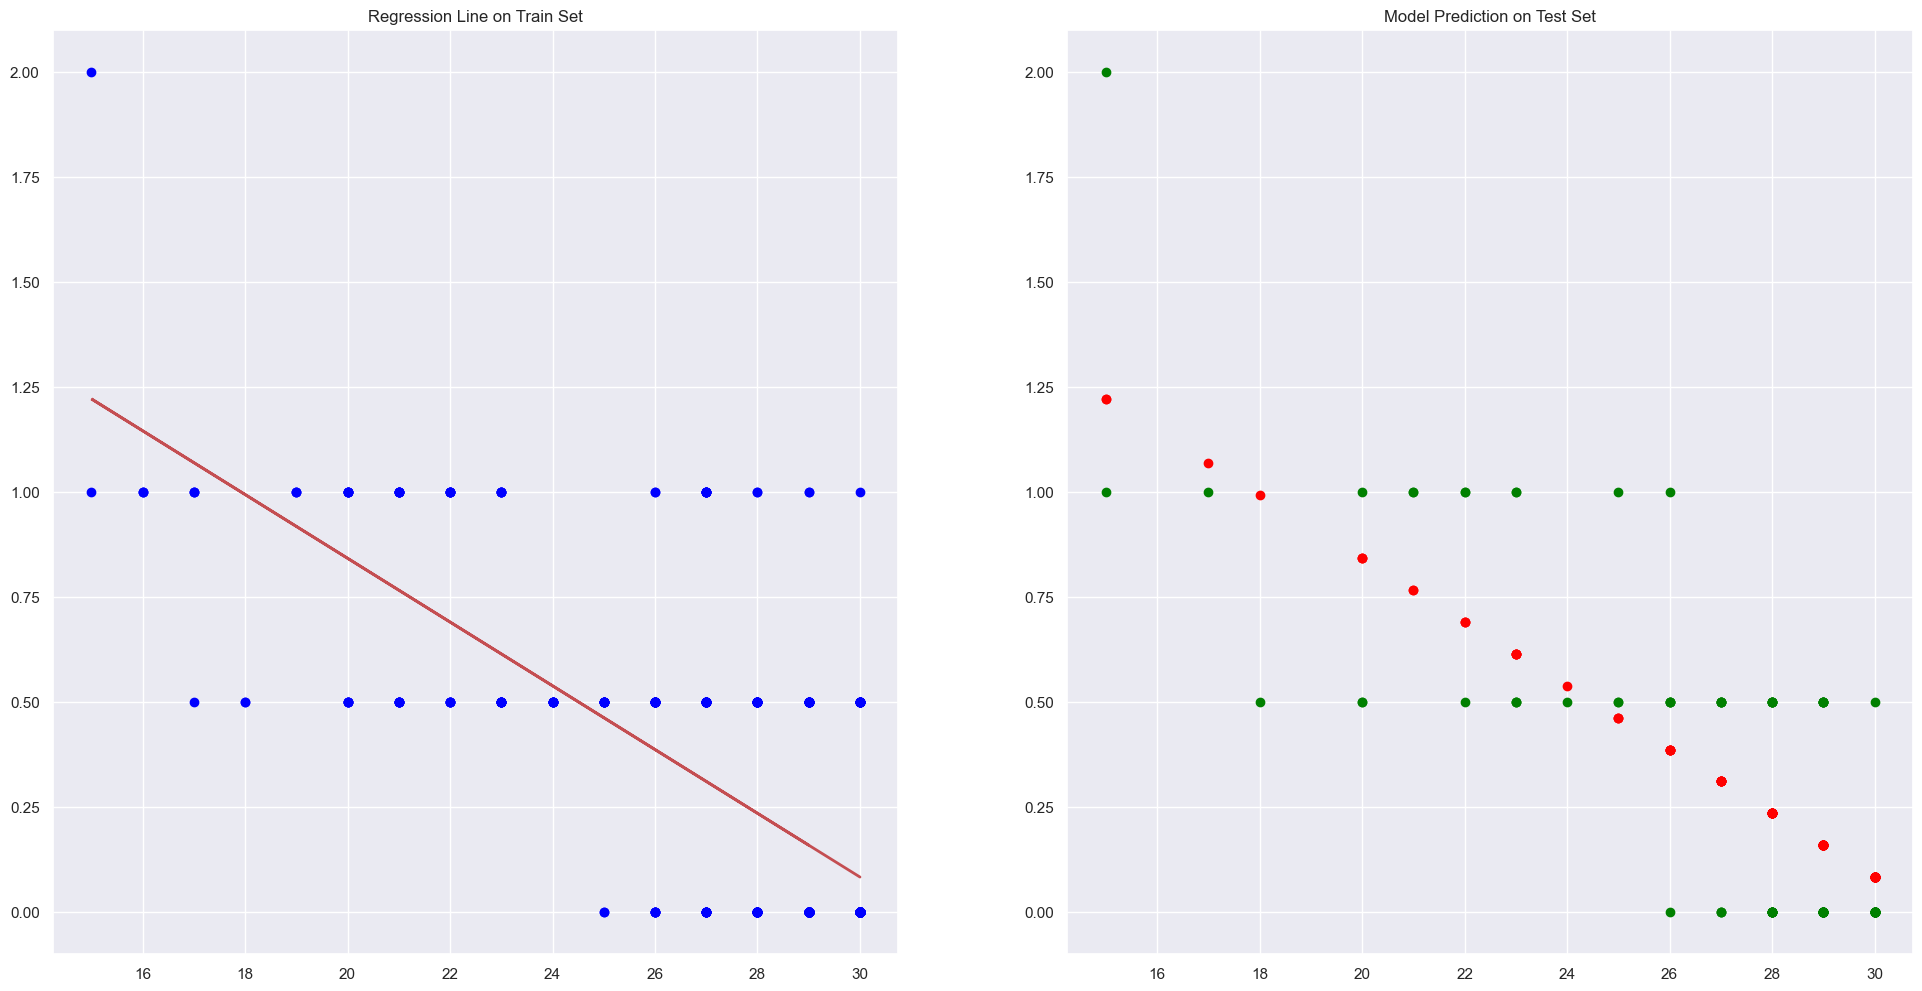

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4913278933047901
Mean Squared Error (MSE) 	: 0.061004156718574426
Root Mean Squared Error (RMSE) 	: 0.24699019559200003
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6274552005252145
Mean Squared Error (MSE) 	: 0.0498795946475668
Root Mean Squared Error (RMSE) 	: 0.22333740091522244


In [14]:
main(clean_mmse, clean_cdr)

### Comments
The model is accurate as there errors decreased in the train dataset. This is likely due to the close relationship between cognitive impairment and dementia, improving the predictive relationship.

# Predicting `CDR` using `eTIV`

In [15]:
countOutliers(alzheimersData, 'eTIV', 'CDR')

13

In [16]:
clean_data_etiv = removeOutliers(alzheimersData, 'eTIV', 'CDR')

In [17]:
clean_etiv = pd.DataFrame(clean_data_etiv['eTIV'])
clean_cdr = pd.DataFrame(clean_data_etiv['CDR'])


Intercept of Regression 	: b =  [0.13027489]
Coefficients of Regresion 	: a =  [[0.00010254]]



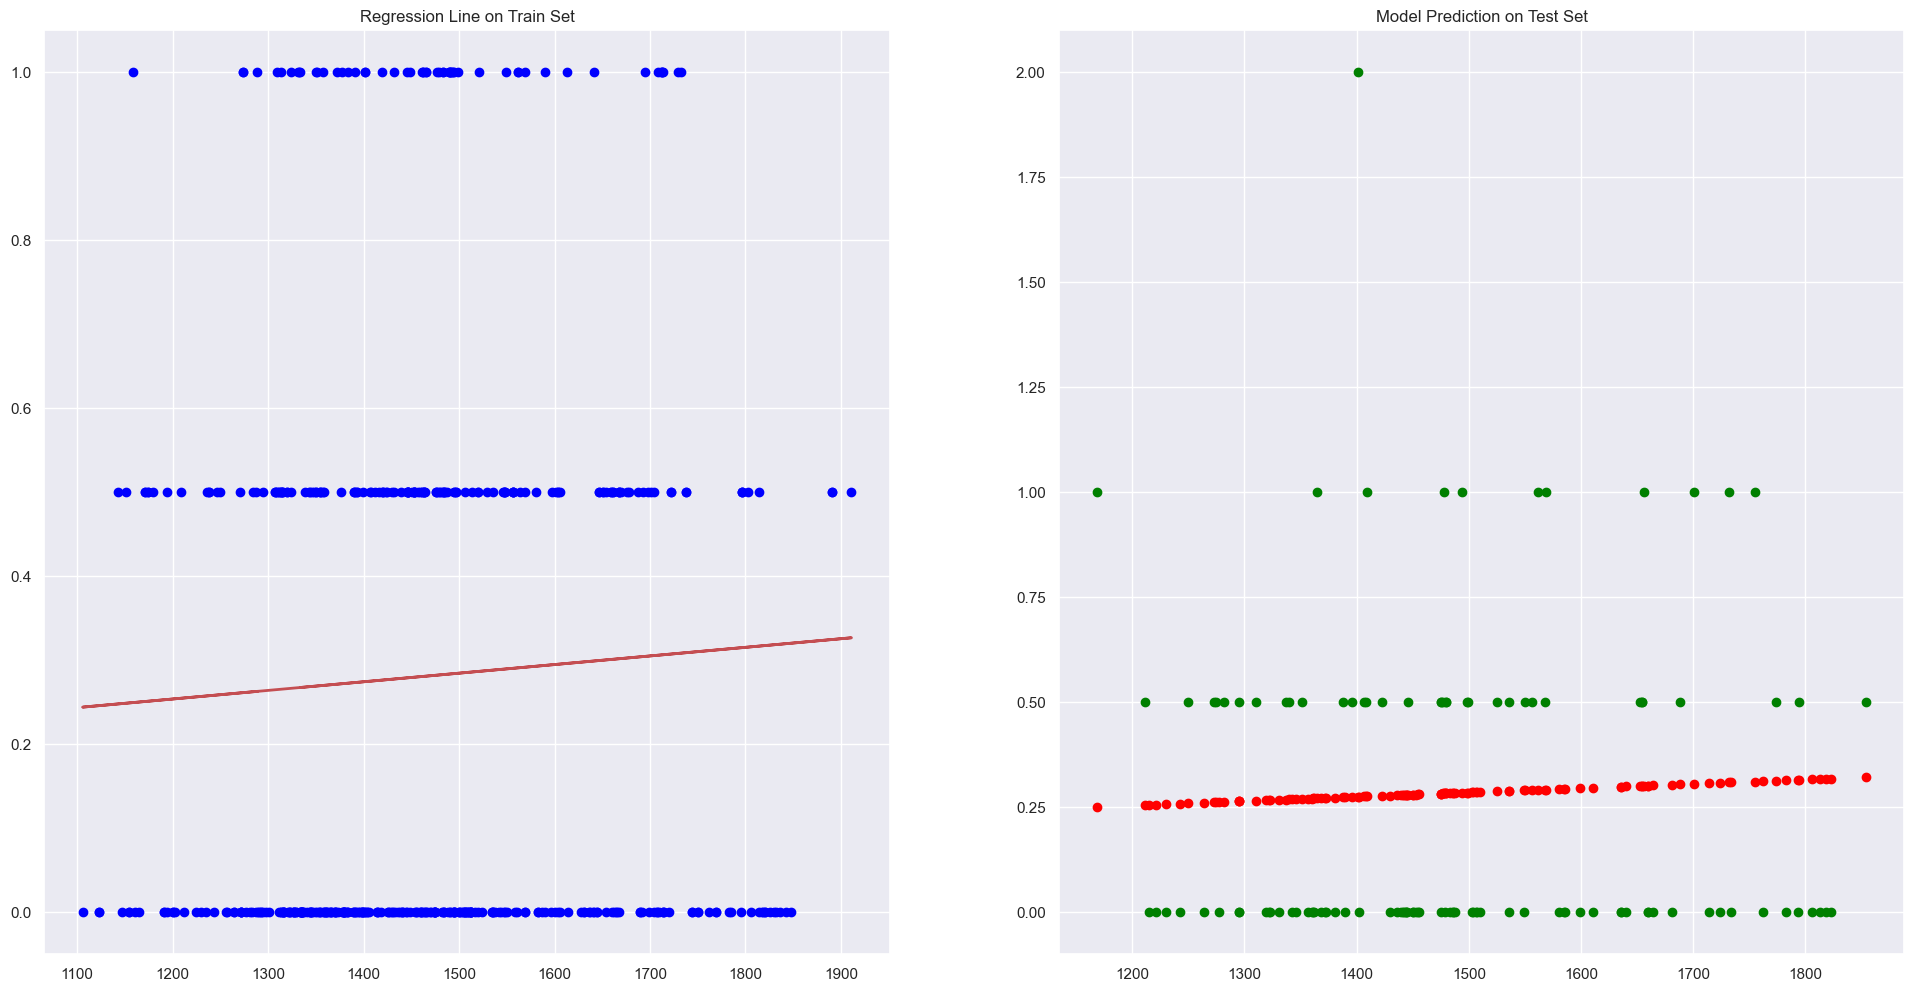

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.002259128365006635
Mean Squared Error (MSE) 	: 0.12117164275811297
Root Mean Squared Error (RMSE) 	: 0.34809717430354553
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.006602644065923036
Mean Squared Error (MSE) 	: 0.13477287007619448
Root Mean Squared Error (RMSE) 	: 0.36711424662657055


In [18]:
main(clean_etiv, clean_cdr)

### Comments
The model is less accurate as the errors increased slightly. This could be due to the data set training with a wider distribution of eTIV values as mentioned. 

# Predicting `CDR` using `nWBV`

In [19]:
countOutliers(alzheimersData, 'nWBV', 'CDR')

5

In [20]:
clean_data_nwbv = removeOutliers(alzheimersData, 'nWBV', 'CDR')

In [21]:
clean_nwbv = pd.DataFrame(clean_data_nwbv['nWBV'])
clean_cdr = pd.DataFrame(clean_data_nwbv['CDR'])

Intercept of Regression 	: b =  [2.7227159]
Coefficients of Regresion 	: a =  [[-3.30511553]]



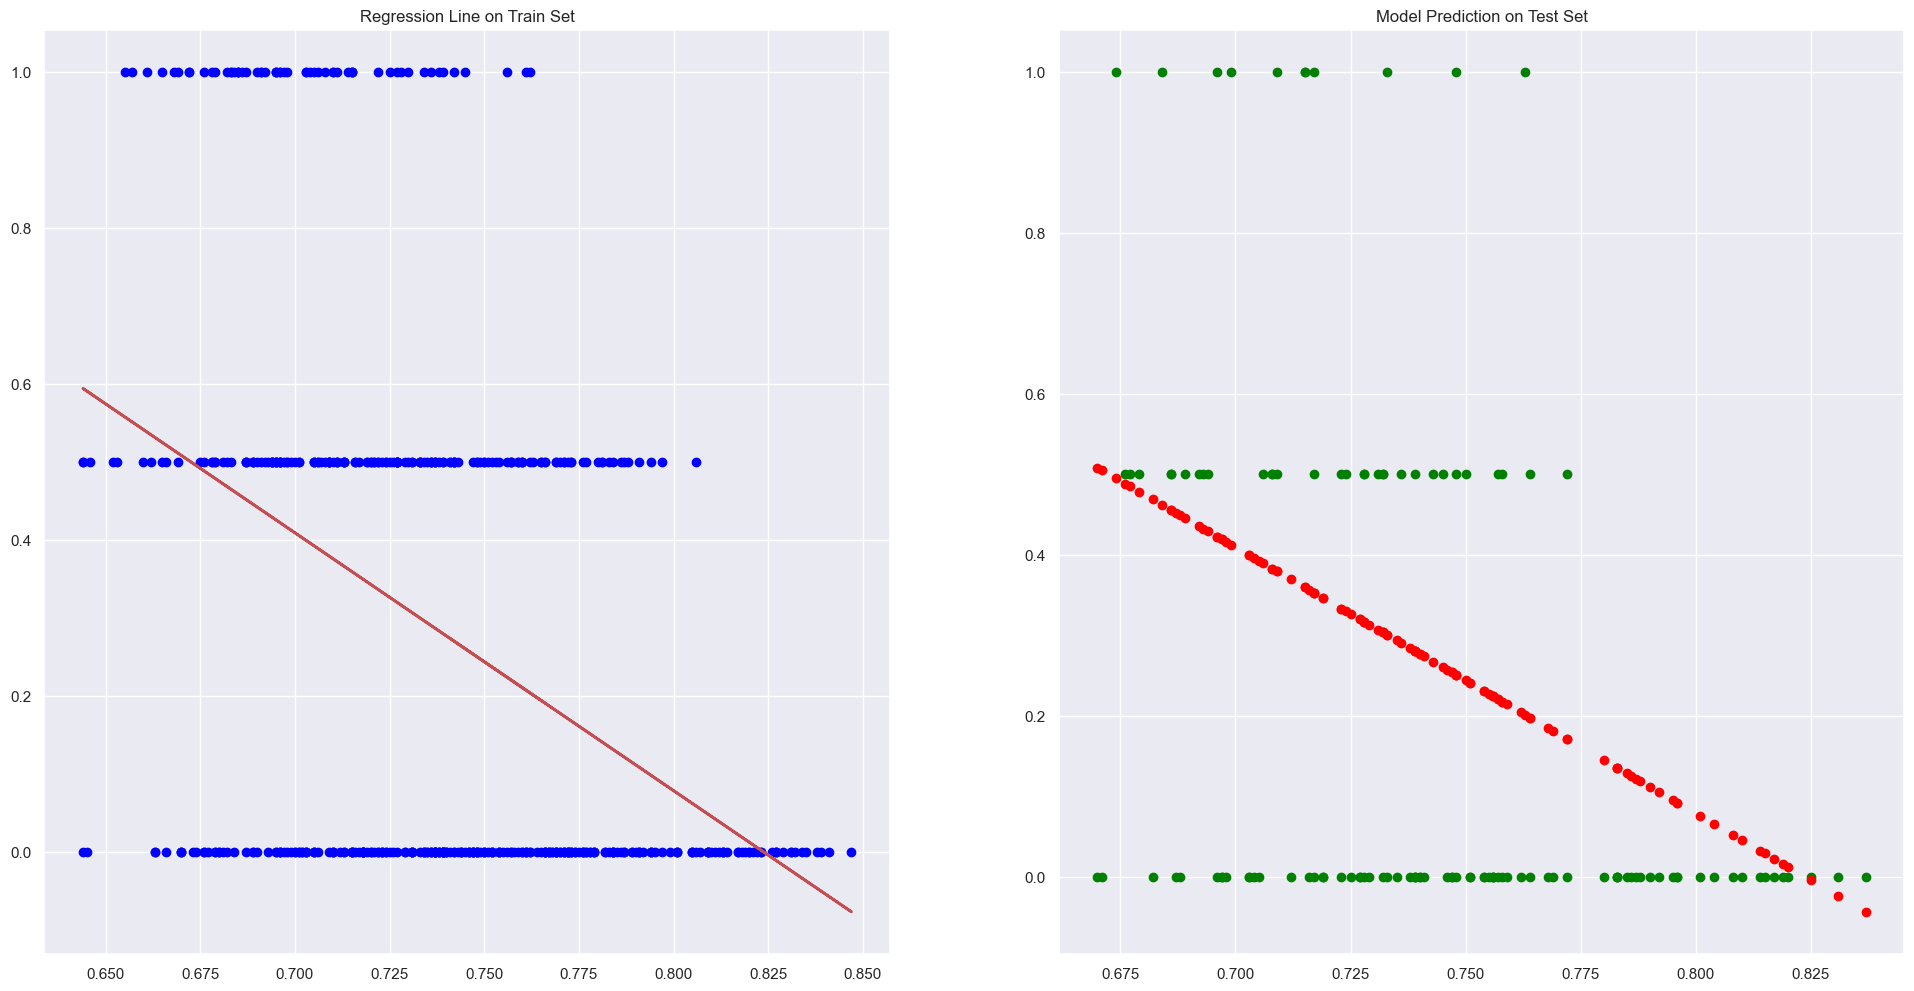

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.16747119909051378
Mean Squared Error (MSE) 	: 0.10089651055597998
Root Mean Squared Error (RMSE) 	: 0.31764211080393606
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.12703872281863693
Mean Squared Error (MSE) 	: 0.09340166933301039
Root Mean Squared Error (RMSE) 	: 0.30561686689875345


In [22]:
main(clean_nwbv, clean_cdr)

### Comments
Similarly to eTIV, the model is accurate as the errors have decreased in the test dataset. However, the increase in explained variance could be due to the wider distribution of eTIV among the subjects.

# Predicting `CDR` using `ASF`

In [23]:
countOutliers(alzheimersData, 'ASF', 'CDR')

5

In [24]:
clean_data_asf = removeOutliers(alzheimersData, 'ASF', 'CDR')

In [25]:
clean_asf = pd.DataFrame(clean_data_asf['ASF'])
clean_cdr = pd.DataFrame(clean_data_asf['CDR'])

Intercept of Regression 	: b =  [0.53446252]
Coefficients of Regresion 	: a =  [[-0.22099141]]



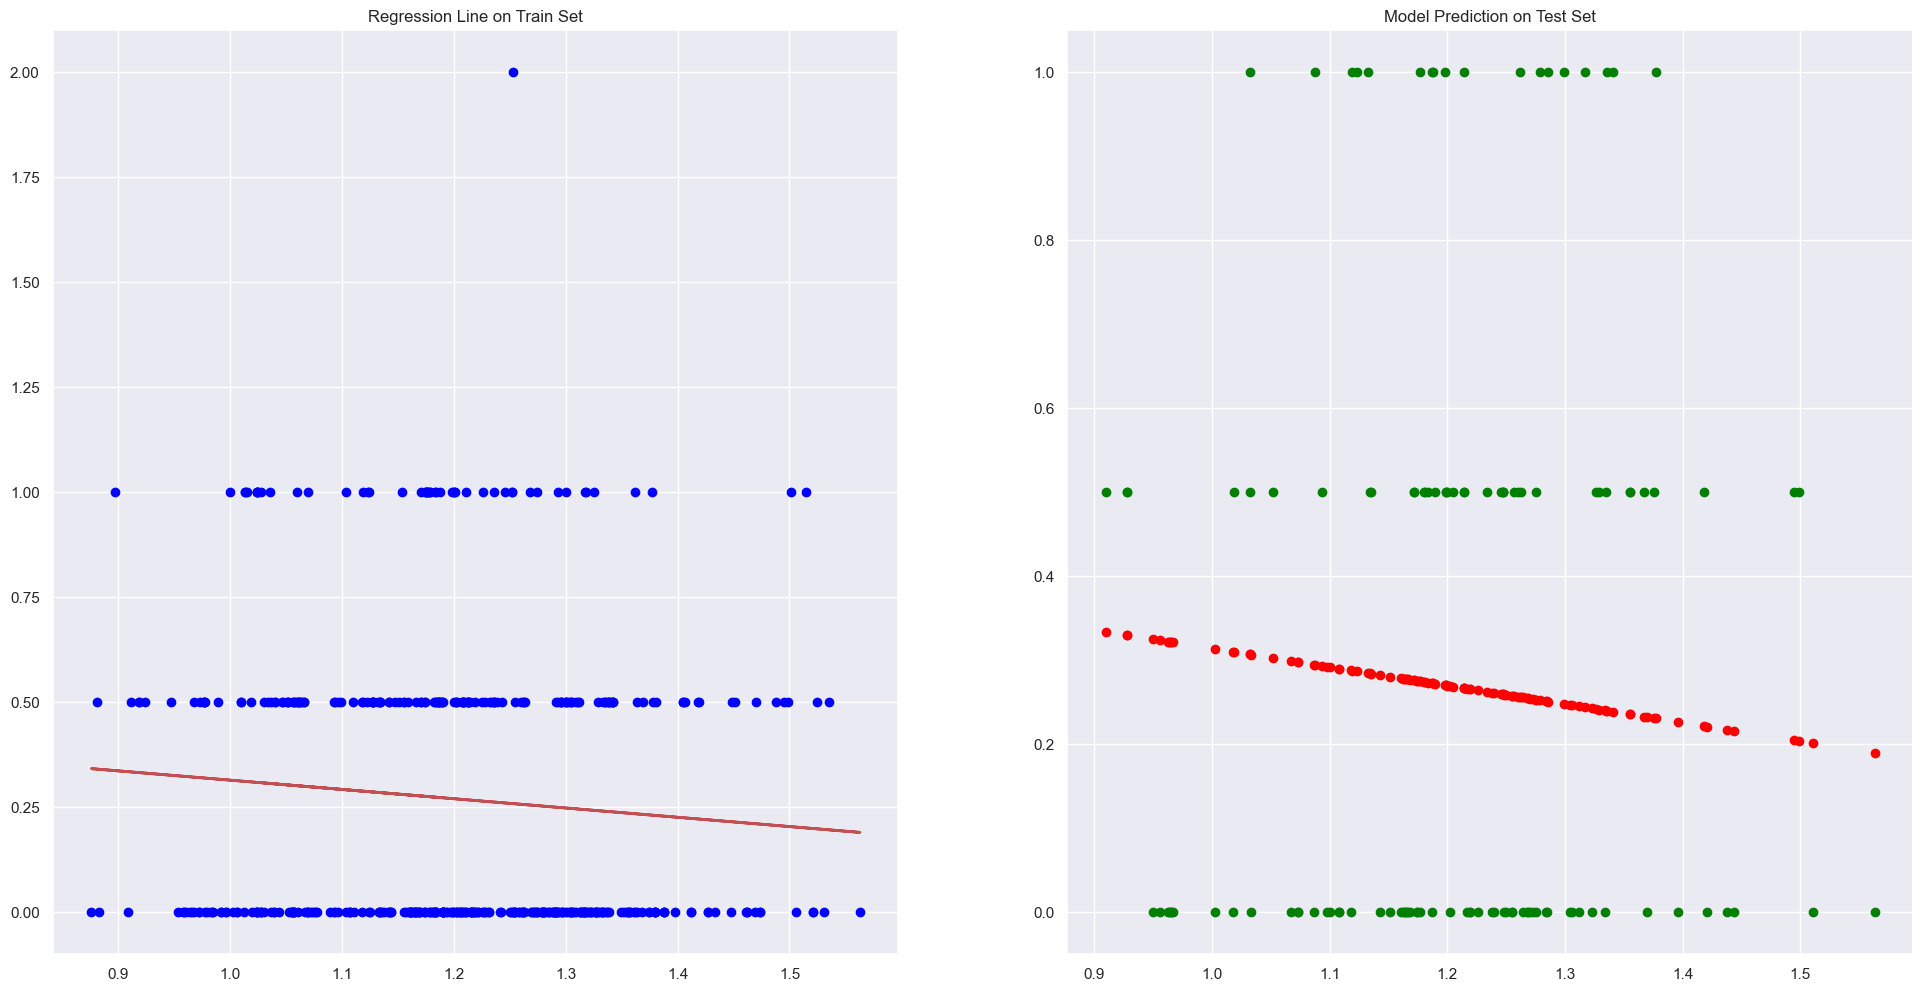

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.007328181566659153
Mean Squared Error (MSE) 	: 0.12039121797202364
Root Mean Squared Error (RMSE) 	: 0.3469743765352474
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.035557645722592346
Mean Squared Error (MSE) 	: 0.13749908225426677
Root Mean Squared Error (RMSE) 	: 0.370808686864624


In [26]:
main(clean_asf, clean_cdr)

### Comments
The model is not as accurate in predicting CDR since the errors have increased. However, as mentioned ASF values serve as a quality assurance metric in neuroimaging studies and may not have an explicit relationship with CDR.

# Overall Evaluation

## Pair-Plot

We will first drop the columns which is not essential to our analysis here, mainly MRI ID, M/F, Educ, SES

In [9]:
alzheimersData_dropped = alzheimersData.drop(alzheimersData.columns[0], axis=1).drop(columns=['M/F', 'Educ', 'SES'])

/Users/choonray/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


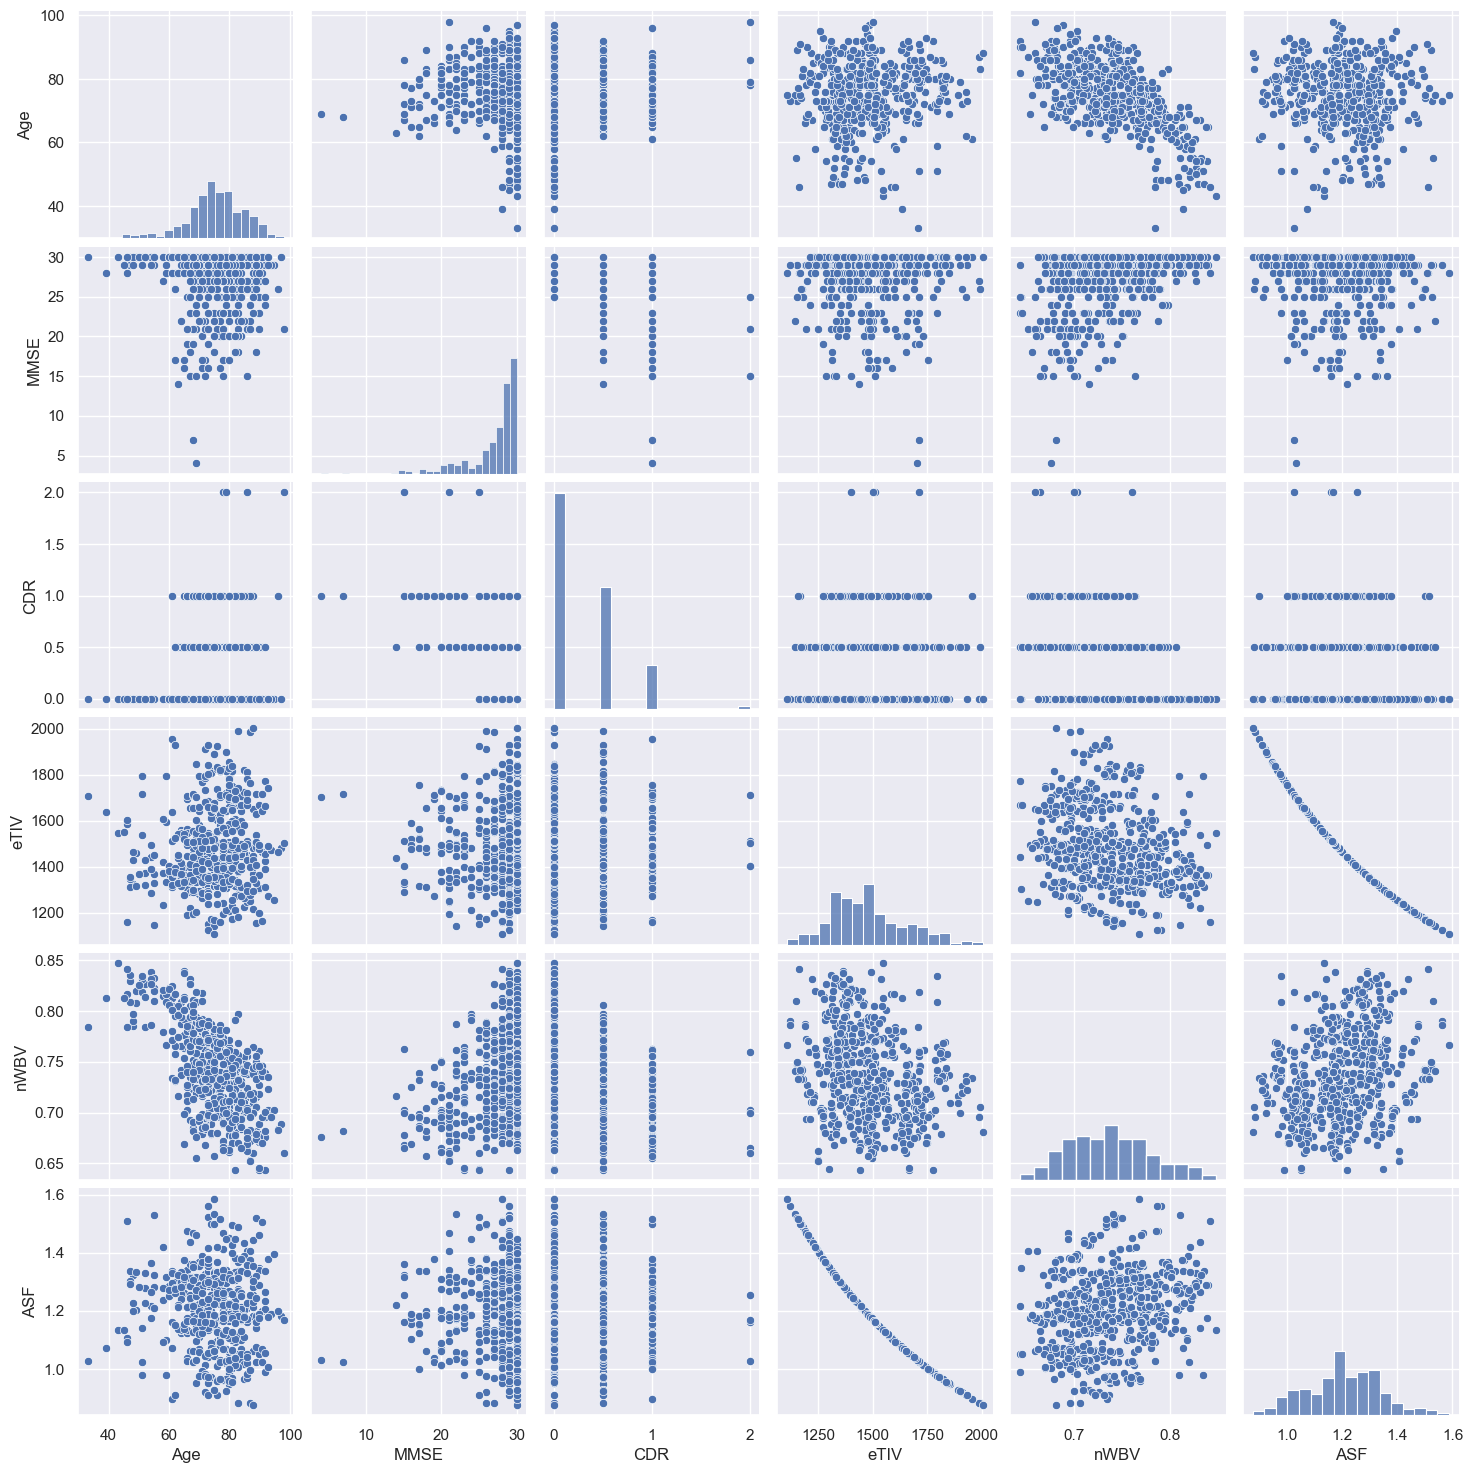

In [10]:

sb.pairplot(alzheimersData_dropped)

plt.show()

## Mutual Correlation

We will first drop the columns which is not essential to our analysis here, mainly `MRI ID`, `M/F`, `Educ`, `SES`

In [6]:
alzheimersData_dropped = alzheimersData.drop(alzheimersData.columns[0], axis=1).drop(columns=['M/F', 'Educ', 'SES'])

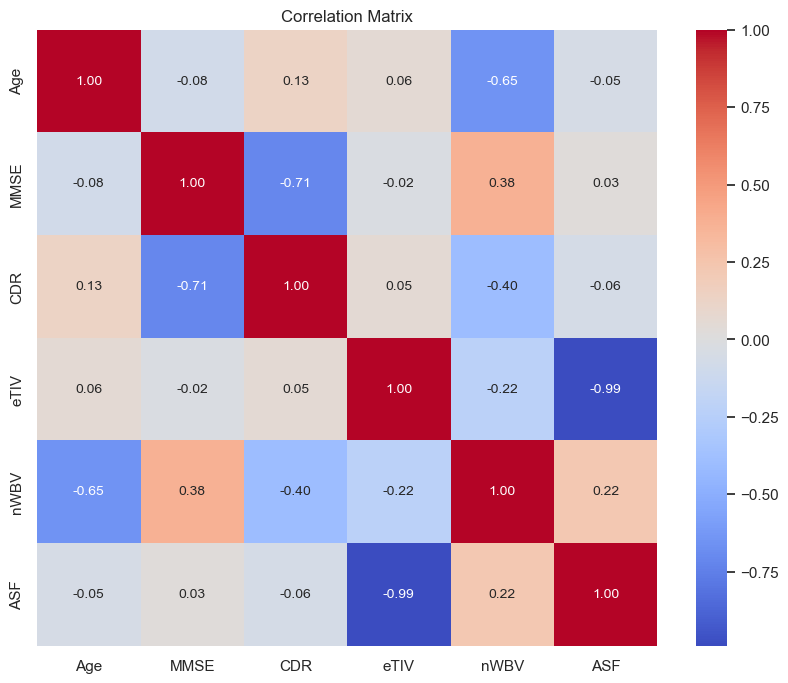

In [7]:
correlation_matrix = alzheimersData_dropped.corr()

# Visualise the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()